In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Import all relevant libraries
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
import urllib.request
from matplotlib import pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
nltk.download('punkt')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Source a copy of the text, 
#### I am using a free copy of *Frankenstein, by Mary Wollstonecraft (Godwin) Shelley* 
#### from the Project Gutenberg website using the urllib.request library.

In [2]:
#Retrieve a copy of the text from the url
text_file = urllib.request.urlopen("https://www.gutenberg.org/files/84/84-0.txt")
#https://www.gutenberg.org/cache/epub/64317/pg64317.txt

#Read and decode the text
text = text_file.read().decode('utf-8')

#Preview a section of the text
print(text[1400:2000])

pter 21
 Chapter 22
 Chapter 23
 Chapter 24




Letter 1

_To Mrs. Saville, England._


St. Petersburgh, Dec. 11th, 17—.


You will rejoice to hear that no disaster has accompanied the
commencement of an enterprise which you have regarded with such evil
forebodings. I arrived here yesterday, and my first task is to assure
my dear sister of my welfare and increasing confidence in the success
of my undertaking.

I am already far north of London, and as I walk in the streets of
Petersburgh, I feel a cold northern breeze play upon my cheeks, which
braces my nerves and fills


In [3]:
# Tokenize text by words
words = word_tokenize(text)

# Check the number of words
print(f"The total number of words in the text is {len(words)}")

The total number of words in the text is 88773


In [4]:
# Find the frequency of words
fdist = FreqDist(words)

# Print the 20 most common words
fdist.most_common(20)

[(',', 5105),
 ('the', 4073),
 ('and', 2998),
 ('I', 2839),
 ('.', 2808),
 ('of', 2748),
 ('to', 2154),
 ('my', 1632),
 ('a', 1395),
 ('in', 1136),
 ('was', 1020),
 ('that', 1016),
 (';', 972),
 ('me', 857),
 ('with', 704),
 ('had', 684),
 ('not', 581),
 ('which', 565),
 ('but', 551),
 ('you', 550)]

In [5]:
# Create an empty list to store words
words_no_punc = []

# Iterate through the words list to remove punctuations
for word in words: 
    if word.isalpha():
        words_no_punc.append(word.lower())
        
# Print number of words without punctuation
print(f"The total number of words without punctuation is {len(words_no_punc)}")

The total number of words without punctuation is 77522


### **Check Top Word List**

##### Check our list of the top 20 words without punctuations.

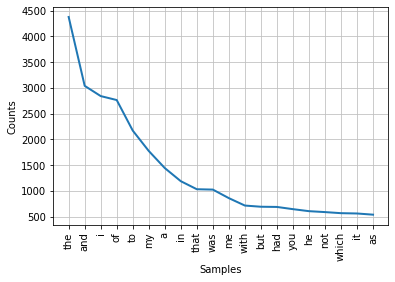

In [6]:
# Find the frequency of words
fdist = FreqDist(words_no_punc)

# Plot the 20 most common words
fdist.plot(20)
plt.show()

#### Now our list is made up of entirely stopwords. 
##### They carry little semantic weight and don't 
##### provide any information of value to the reader.


## **Download & Import Stopwords**

In [7]:
# Download and import list of stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords

# List of stopwords
stopwords_list = stopwords.words("english")
print(stopwords_list)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both'

### **Create `for loop`**

#### Use a `for loop` to iterate through every word in our list, 
#### and append any word that is not in the list of stopwords to a new list.

In [8]:
# Create an empty list to store clean words
clean_words = []

# Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)
        
print(f"The total number of words without punctuation and stopwords is {len(clean_words)}")

The total number of words without punctuation and stopwords is 35631


### **Plot 20 Most Common Words**

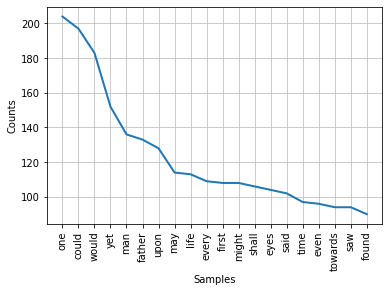

In [9]:
# Find the frequency of words
fdist = FreqDist(clean_words)

# Plot the 20 most common words
fdist.plot(20)
plt.show()

##### Now we have a more meaningful list, but there are still some words in the list, 
#### like `said`, `like`, `came`, and `back` that could count as stopwords. 
##### This is *discreational* and **depends** on the *objective* of the analysis and text.

##### Luckily, we don't need to create a completely new list. 
##### We can add new words to our previous list by using the `extend()` method.

In [10]:
# Update the stopwords list
stopwords_list.extend(["said", "one", "like", "came", "back", "know", "when", "got", "did", "come", "knew", "could", "would", "may", "yet", "thought", "sometimes", "although", "must", "also", "already", "" "even", "ever", "upon", "shall"])

# Create an empty list to store clean words
clean_words = []

# Iterate through the words_no_punc list and add non stopwords to the new clean_words list
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)

### **Now that our stopwords are updated and applied, we can visualize the final iteration of our top 20 most common words**

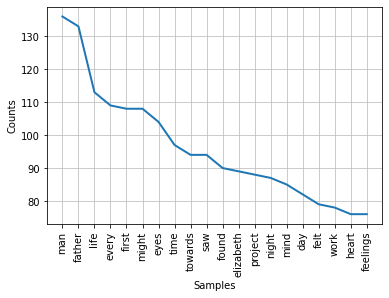

In [11]:
# Find the frequency of words
fdist = FreqDist(clean_words)

#Plot the 20 most common words
fdist.plot(20)
plt.show()

## **The Final Task - Create a Word Cloud**

(-0.5, 399.5, 199.5, -0.5)

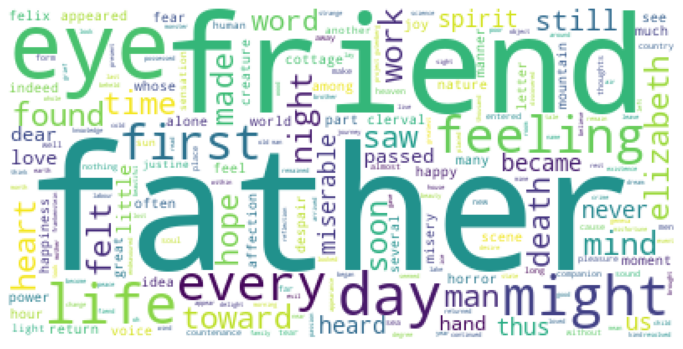

In [12]:
# Convert word list to a single string
clean_words_string = " ".join(clean_words)

# Generating the wordcloud
wordcloud = WordCloud(background_color="white").generate(clean_words_string)

# Plot the wordcloud
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

# To remove the axis value
plt.axis("off")
